<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/Unsupervised%20Learning/%ED%95%B8%EC%A6%88%EC%98%A8%20%EB%B9%84%EC%A7%80%EB%8F%84%20%ED%95%99%EC%8A%B5/Ch_2_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_A_to_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

## Google Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Library

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# Load Data Set

In [ ]:
file_path = '/content/drive/MyDrive/머신러닝 엔지니어링/핸즈온 비지도 학습/data/creditcard.csv'

data = pd.read_csv(file_path)

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# DDA

## 데이터 개요

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## 결측치 확인

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## 데이터 고유값 확인

In [ ]:
data.apply(lambda x : len(x.unique()))

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

# 표준화

In [ ]:
X = data.copy().drop(columns='Class')
y = data['Class'].copy()

In [ ]:
Features2Scale = X.drop(columns='Time').columns
scaler = StandardScaler(copy=True)
X.loc[:,Features2Scale] = scaler.fit_transform(X[Features2Scale])

In [ ]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-1.506872e-17,-9.580116e-18,-8.622104e-17,-5.189230e-18,3.832046e-17,9.979288e-18,1.237432e-17,-3.193372e-18,7.234983e-19,...,-1.247411e-18,-3.642440e-18,3.193372e-18,8.781773e-18,9.580116e-18,-5.029561e-17,5.887780e-18,2.444925e-18,-7.908585e-18,2.913952e-17
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


# 시각화

## 상관계수

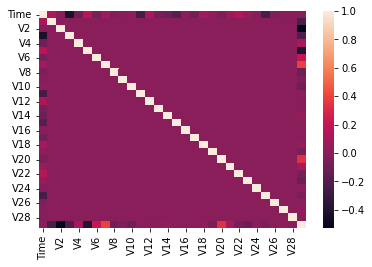

In [ ]:
sns.heatmap(X.corr())

## 데이터 불균형

Text(0, 0.5, 'Frequency Percentage')

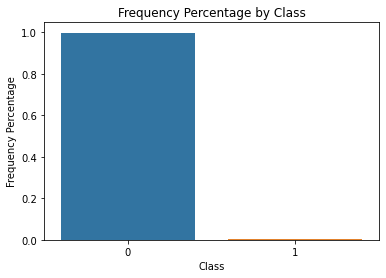

In [ ]:
count_class = pd.DataFrame(data['Class'].value_counts()).T
count_class_ratio = count_class.apply(lambda x : x / len(data))

ax = sns.barplot(data=count_class_ratio)
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

# 모델링

## Train / Test Data set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=2022)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(190820, 30)
(93987, 30)
(190820,)
(93987,)


## Stratified KFold

In [ ]:
KFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2022)

## 재귀 함수

In [ ]:
def train_model(model):

  predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                          index=y_train.index,columns=[0,1])

  trainingScores = []
  cvScores = []

  model = model

  num_fold = 0

  for train_index, cv_index in KFold.split(np.zeros(len(X_train)) ,y_train.ravel()):

      X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
      y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
      
      model.fit(X_train_fold, y_train_fold)

      loglossTraining = log_loss(y_train_fold, 
                                model.predict_proba(X_train_fold)[:,1])
      
      trainingScores.append(loglossTraining)
      
      predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = model.predict_proba(X_cv_fold) 

      loglossCV = log_loss(y_cv_fold, 
                          predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
      
      cvScores.append(loglossCV)

      print(f'\nFold Num : {num_fold}\n')
      
      print('Training Log Loss: ', loglossTraining)
      print('CV Log Loss: ', loglossCV)

      num_fold += 1
      
  logloss = log_loss(y_train, predictionsBasedOnKFolds.loc[:,1])

  print(f'\nLog Loss : {logloss}\n')

  dict_result = {'train log loss':trainingScores, 'cv log loss':cvScores}
  df_result = pd.DataFrame(dict_result)

  sns.lineplot(data=df_result)
  plt.show()

  return model, trainingScores, cvScores, predictionsBasedOnKFolds

In [ ]:
def ROC_Curve(predictionsBasedOnKFolds):
  preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
  preds.columns = ['trueLabel','prediction']
  predictionsBasedOnKFolds = preds.copy()

  precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
  
  average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])
  
  plt.step(recall, precision, color='k', alpha=0.7, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])

  plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
            average_precision))
  
  plt.show()

  fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
  areaUnderROC = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
  plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic: \
            Area under the curve = {0:0.2f}'.format(areaUnderROC))
  plt.legend(loc="lower right")
  plt.show()

## 로지스틱 회귀

### 하이퍼파라미터 설정

In [ ]:
params = {
    'penalty':'l2',
    'C':1.0,
    'class_weight':'balanced',
    'random_state':2022,
    'solver':'liblinear'
}

In [ ]:
logReg = LogisticRegression(**params)

### 모델 훈련


Fold Num : 0

Training Log Loss:  0.09839308835254075
CV Log Loss:  0.10055683484607718

Fold Num : 1

Training Log Loss:  0.11072169086468958
CV Log Loss:  0.10600489054131258

Fold Num : 2

Training Log Loss:  0.10767747110413665
CV Log Loss:  0.11145414371481409

Fold Num : 3

Training Log Loss:  0.09703330707004298
CV Log Loss:  0.09250518419187248

Fold Num : 4

Training Log Loss:  0.0973737497143742
CV Log Loss:  0.1041293625976699

Log Loss : 0.10293008317834927



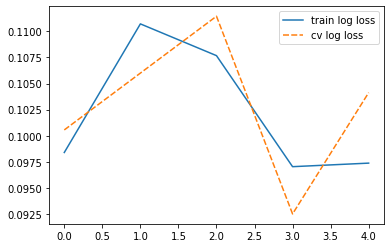

In [ ]:
logReg, trainingScores, cvScores, predictionsBasedOnKFoldsLogisticRegression = train_model(logReg)

### 평가 지표

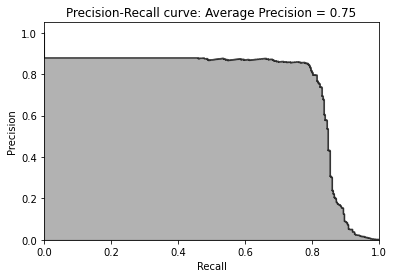

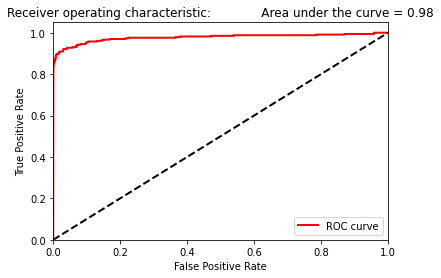

In [ ]:
ROC_Curve(predictionsBasedOnKFoldsLogisticRegression)

## 랜덤 포레스트

### 하이퍼 파라미터 설정

In [ ]:
params = {
    'n_estimators':10,
    'max_features':'auto',
    'max_depth':None,
    'min_samples_split':2,
    'min_samples_leaf':1,
    'min_weight_fraction_leaf':0.0,
    'max_leaf_nodes':None,
    'bootstrap':True,
    'oob_score':False,
    'random_state':2022,
    'class_weight':'balanced'
}

In [ ]:
RFC = RandomForestClassifier(**params)

### 모델 훈련


Fold Num : 0

Training Log Loss:  0.0004092330581893481
CV Log Loss:  0.010075418344035055

Fold Num : 1

Training Log Loss:  0.0004469069746501158
CV Log Loss:  0.005365227447236179

Fold Num : 2

Training Log Loss:  0.00041263740331328683
CV Log Loss:  0.009905961137116281

Fold Num : 3

Training Log Loss:  0.0003913144945438703
CV Log Loss:  0.013584236242116575

Fold Num : 4

Training Log Loss:  0.00040718446809675894
CV Log Loss:  0.016345449170458288

Log Loss : 0.011055258468192474



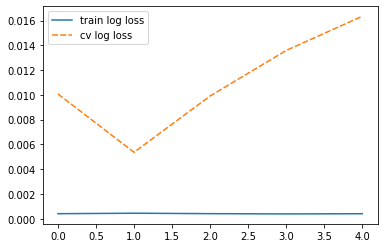

In [ ]:
RFC, trainingScores, cvScores, predictionsBasedOnKFoldsRandomForests = train_model(RFC)

### 평가 지표

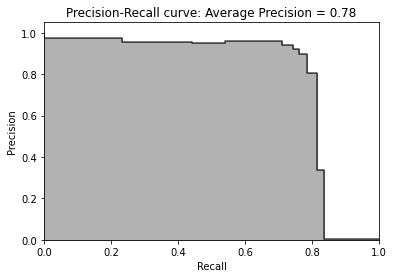

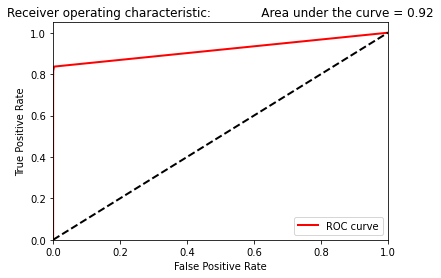

In [ ]:
ROC_Curve(predictionsBasedOnKFoldsRandomForests)

## XGB

### 하이퍼 파라미터 설정

In [ ]:
params = {
    'nthread':16, # 코어 수
    'learning rate': 0.3, # 학습률 : 범위 (0 ~ 1) , 디폴트 0.3
    'gamma': 0, # 감마 : 범위 (0 ~ 무한대) , 디폴트 0
        # 이 값이 높으면 복잡성이 감소(편향 증가, 변동 감소) 
    'max_depth': 6, # max_depth : 범위 (1 ~ 무한대) , 디폴트 6 ## 트리의 최대 깊이
    'min_child_weight': 1, # min_child_weight : 범위 (0 ~ 무한대) , 디폴트 1 ## 자식노드에 필요한 가중치의 최소 합계
    'max_delta_step': 0, # max_delta_step : 범위 (0 ~ 무한대) ,  디폴트 0 ## 각 트리의 가중치 추정을 위한 최대 델타 단계
    'subsample': 1.0, # subsample : 범위 (0 ~ 1) , 디폴트 1
        # 훈련 데이터의 샘플링 비율
    'colsample_bytree': 1.0, # colsample_bytree : 범위 (0 ~ 1) , 디폴트 1
        # 훈련 피쳐의 샘플링 비율
    'objective':'binary:logistic',
    'num_class':1,
    'eval_metric':'logloss',
    'seed':2018,
    'silent':1
}

In [ ]:
xgbClass = xgb.XGBRFClassifier(**params)

### 모델 훈련


Fold Num : 0

Training Log Loss:  0.12785296392370438
CV Log Loss:  0.12810867586644564

Fold Num : 1

Training Log Loss:  0.12796790680004005
CV Log Loss:  0.12781376745777667

Fold Num : 2

Training Log Loss:  0.1279246756044029
CV Log Loss:  0.12796583086416163

Fold Num : 3

Training Log Loss:  0.1278491648625258
CV Log Loss:  0.12817064329369918

Fold Num : 4

Training Log Loss:  0.12777906627996627
CV Log Loss:  0.12854839569328635

Log Loss : 0.1281214626350739



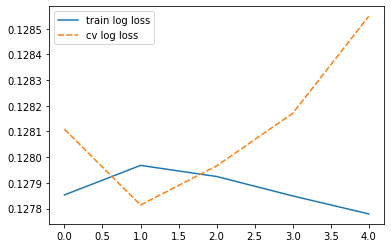

In [ ]:
xgbClass, trainingScores, cvScores, predictionsBasedOnKFoldsXGBoostGradientBoosting = train_model(xgbClass)

### 평가 지표

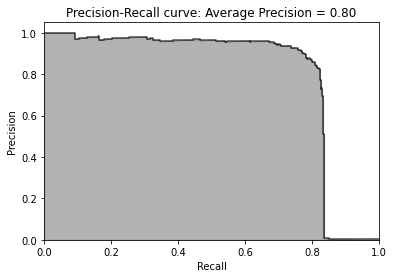

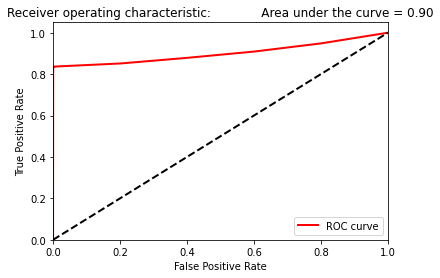

In [ ]:
ROC_Curve(predictionsBasedOnKFoldsXGBoostGradientBoosting)

## LGBM

### 하이퍼 파라미터 설정

In [ ]:
params = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':16
}

In [ ]:
lgbmClass = lgb.LGBMClassifier(**params)


Fold Num : 0

Training Log Loss:  0.002670473859663606
CV Log Loss:  0.0038708284766890734

Fold Num : 1

Training Log Loss:  0.0029363119708156454
CV Log Loss:  0.002689231230626997

Fold Num : 2

Training Log Loss:  0.0028151463691946385
CV Log Loss:  0.0030797848252452306

Fold Num : 3

Training Log Loss:  0.0026034934831715667
CV Log Loss:  0.0039452370073659445

Fold Num : 4

Training Log Loss:  0.0024301516904667152
CV Log Loss:  0.005033205465922407

Log Loss : 0.0037236574011699306



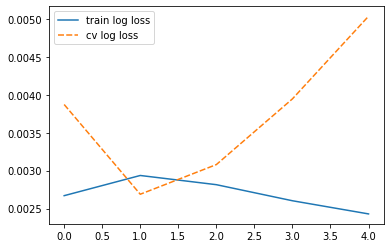

In [ ]:
lgbmClass, trainingScores, cvScores, predictionsTestSetLightGBMGradientBoosting = train_model(lgbmClass)

### 평가 지표

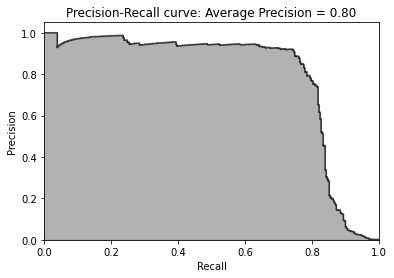

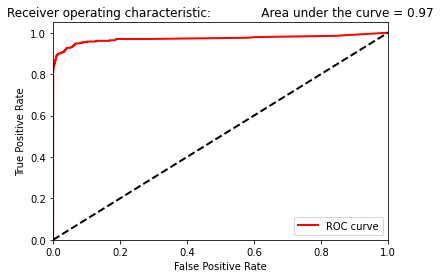

In [ ]:
ROC_Curve(predictionsTestSetLightGBMGradientBoosting)

## 테스트 셋에서의 4가지 모델 평가

In [ ]:
predictionsTestSetLogisticRegression = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLogisticRegression.loc[:,'prediction'] = \
    logReg.predict_proba(X_test)[:,1]
logLossTestSetLogisticRegression = \
    log_loss(y_test, predictionsTestSetLogisticRegression)

In [ ]:
predictionsTestSetRandomForests = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetRandomForests.loc[:,'prediction'] = \
    RFC.predict_proba(X_test)[:,1]
logLossTestSetRandomForests = \
    log_loss(y_test, predictionsTestSetRandomForests)

In [ ]:
predictionsTestSetXGBoostGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = \
    xgbClass.predict(X_test)
logLossTestSetXGBoostGradientBoosting = \
    log_loss(y_test, predictionsTestSetXGBoostGradientBoosting)

In [ ]:
predictionsTestSetLightGBMGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLightGBMGradientBoosting.loc[:,'prediction'] = \
    lgbmClass.predict(X_test)
logLossTestSetLightGBMGradientBoosting = \
    log_loss(y_test, predictionsTestSetLightGBMGradientBoosting)

In [ ]:
print("Log Loss of Logistic Regression on Test Set: ", \
          logLossTestSetLogisticRegression)
print("Log Loss of Random Forests on Test Set: ", \
          logLossTestSetRandomForests)
print("Log Loss of XGBoost Gradient Boosting on Test Set: ", \
          logLossTestSetXGBoostGradientBoosting)
print("Log Loss of LightGBM Gradient Boosting on Test Set: ", \
          logLossTestSetLightGBMGradientBoosting)

Log Loss of Logistic Regression on Test Set:  0.09784806118957143
Log Loss of Random Forests on Test Set:  0.01129851531848502
Log Loss of XGBoost Gradient Boosting on Test Set:  0.020211755848035827
Log Loss of LightGBM Gradient Boosting on Test Set:  0.022049119364187447


In [ ]:
def test_ROC_Curve(predictionsTestSet):
  precision, recall, thresholds = \
      precision_recall_curve(y_test,predictionsTestSet)
  average_precision = \
      average_precision_score(y_test,predictionsTestSet)

  plt.step(recall, precision, color='k', alpha=0.7, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])

  plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
            average_precision))

  fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSet)
  areaUnderROC = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
  plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic: \
  Area under the curve = {0:0.2f}'.format(areaUnderROC))
  plt.legend(loc="lower right")
  plt.show()

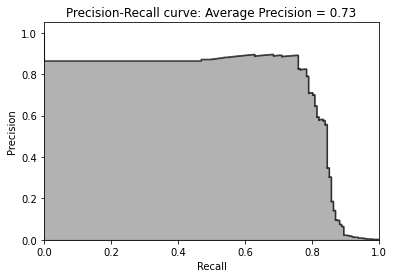

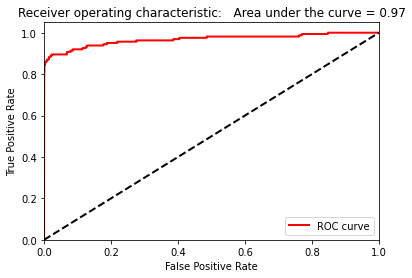

In [ ]:
test_ROC_Curve(predictionsTestSetLogisticRegression)

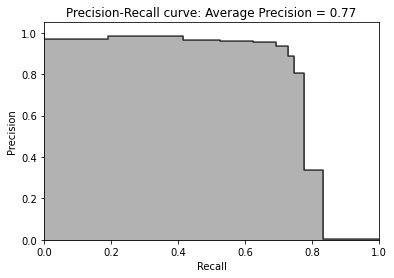

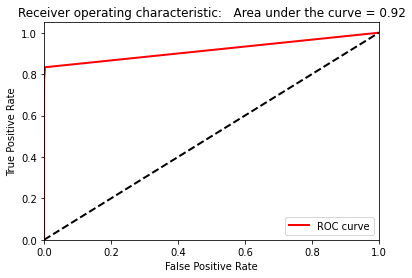

In [ ]:
test_ROC_Curve(predictionsTestSetRandomForests)

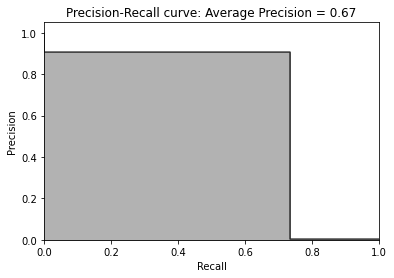

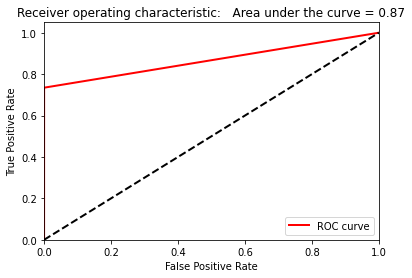

In [ ]:
test_ROC_Curve(predictionsTestSetXGBoostGradientBoosting)

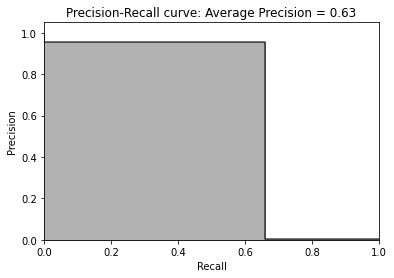

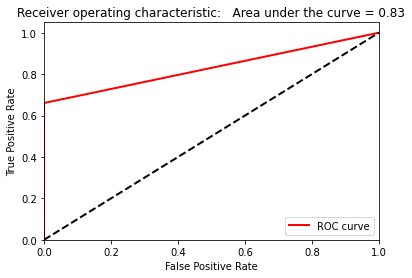

In [ ]:
test_ROC_Curve(predictionsTestSetLightGBMGradientBoosting)